In [1]:
# import all the drequired libraries for the analysis process.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


1. Data Preparation with Python:
- Use Python to clean and preprocess the weather dataset.
- Handle missing values, outliers, and any other inconsistencies in the data.
2. Advanced Analysis with Power BI or Tableau:
- Leverage Power BI or Tableau for advanced data analysis on the weather
dataset.
- Create interactive dashboards and visualizations to highlight trends and
patterns.
3. Correlation and Regression Analysis:
- Perform correlation analysis to identify relationships between different
weather parameters.
- Implement regression analysis to predict one weather parameter based on
others.

## 1 . Data Collection

In [2]:
# import the datainto the jupyter notebook and convert it into a dataframe.
df = pd.read_csv(r"C:\Users\guruc\Desktop\charan\datatsets\Weather_data.csv")
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [3]:
# Define the leap year
leap_year = 2024

# Create a Series with leap year dates and month names
date_range = pd.date_range(start=f'{leap_year}-01-01', end=f'{leap_year}-12-31', freq='D')
leap_year_series = pd.Series(date_range.strftime('%B'), name='LeapYearMonthNames')

# Create a DataFrame and add the Series
df1 = pd.DataFrame({'Date': date_range, 'MonthNames': leap_year_series})

# Display the DataFrame
print(df1)

          Date MonthNames
0   2024-01-01    January
1   2024-01-02    January
2   2024-01-03    January
3   2024-01-04    January
4   2024-01-05    January
..         ...        ...
361 2024-12-27   December
362 2024-12-28   December
363 2024-12-29   December
364 2024-12-30   December
365 2024-12-31   December

[366 rows x 2 columns]


In [4]:
datac = pd.concat([df1,df],axis = 1)
datac

,Date,MonthNames,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2024-01-01,January,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,2024-01-02,January,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,2024-01-03,January,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,2024-01-04,January,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,2024-01-05,January,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,December,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,2024-12-28,December,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,2024-12-29,December,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,2024-12-30,December,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


## 2 . Understanding the Data
 - Examining the structure, data types, and general properties of the dataset.
 - Identifing missing values, outliers, and anomalies.

In [5]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           366 non-null    datetime64[ns]
 1   MonthNames     366 non-null    object        
 2   MinTemp        366 non-null    float64       
 3   MaxTemp        366 non-null    float64       
 4   Rainfall       366 non-null    float64       
 5   Evaporation    366 non-null    float64       
 6   Sunshine       363 non-null    float64       
 7   WindGustDir    363 non-null    object        
 8   WindGustSpeed  364 non-null    float64       
 9   WindDir9am     335 non-null    object        
 10  WindDir3pm     365 non-null    object        
 11  WindSpeed9am   359 non-null    float64       
 12  WindSpeed3pm   366 non-null    int64         
 13  Humidity9am    366 non-null    int64         
 14  Humidity3pm    366 non-null    int64         
 15  Pressure9am    366 non-

In [6]:
datac.isnull().sum()

Date              0
MonthNames        0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

## 3 . Data Cleaning and Preprocessing:
 - Dealing with outliers and anomalies if necessary.
 - Convert data types, standardize or normalize variables.
 - Handle duplicates and irrelevant information.

In [7]:
datac["WindDir9am"].fillna(datac["WindDir9am"].mode()[0],inplace=True)

In [8]:
datac["WindSpeed9am"].fillna(round(datac["WindSpeed9am"].mean()),inplace=True)

In [9]:
datac["WindGustDir"].fillna(datac["WindGustDir"].mode()[0],inplace = True)

In [10]:
datac["WindDir3pm"].fillna(datac["WindDir3pm"].mode()[0],inplace=True)

In [11]:
datac["Sunshine"].fillna(datac["Sunshine"].mean(),inplace=True)

In [12]:
Wind_Gust_Speed_mean=datac['WindGustSpeed'].mean()
datac['WindGustSpeed'].fillna(Wind_Gust_Speed_mean,inplace=True)

In [13]:
datac.duplicated().sum()

0

In [14]:
datac.isnull().sum()

Date             0
MonthNames       0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [15]:
datac.dropna()

,Date,MonthNames,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2024-01-01,January,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,2024-01-02,January,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,2024-01-03,January,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,2024-01-04,January,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,2024-01-05,January,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,December,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,2024-12-28,December,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,2024-12-29,December,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,2024-12-30,December,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


## 4 . EDA (Exploratory Data Analysis)
 - Generating summary statistics for numerical columns.
 - Visualizing distributions, relationships, and patterns using charts and graphs.

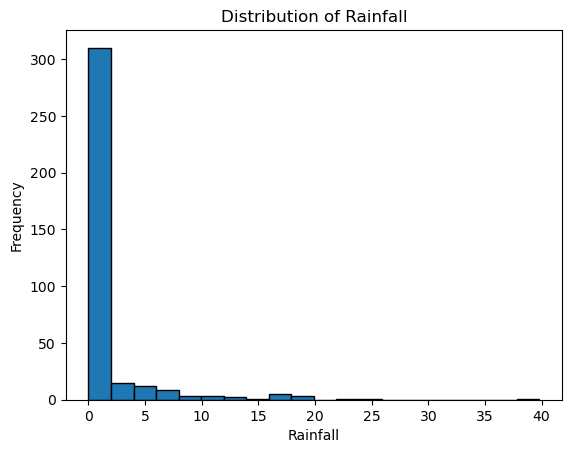

In [16]:
plt.hist(datac['Rainfall'],bins=20,edgecolor='black')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.title('Distribution of Rainfall')
plt.show()

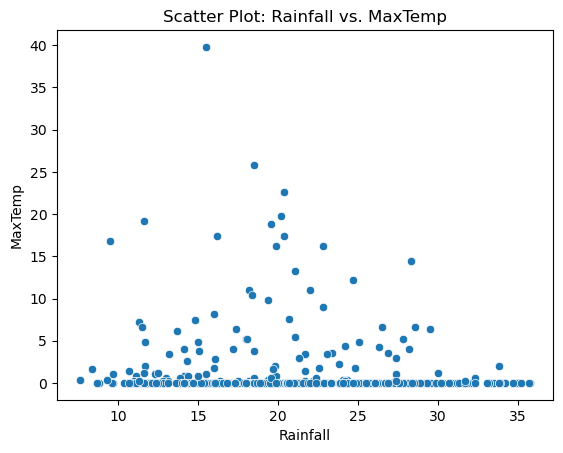

In [17]:
sns.scatterplot(x='MaxTemp',y='Rainfall',data=datac)
plt.xlabel('Rainfall')
plt.ylabel('MaxTemp')
plt.title('Scatter Plot: Rainfall vs. MaxTemp')
plt.show()

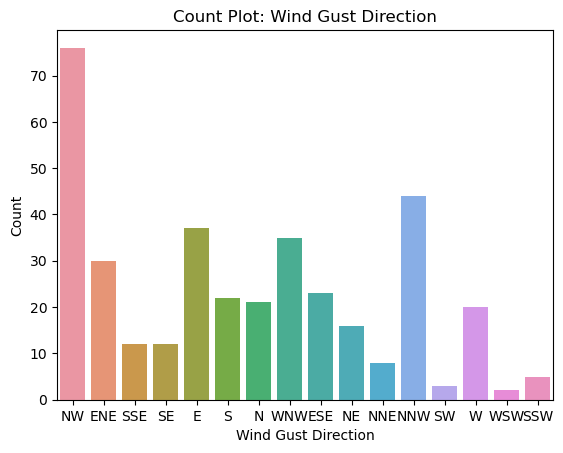

In [18]:
sns.countplot(x='WindGustDir', data=datac)
plt.xlabel('Wind Gust Direction')
plt.ylabel('Count')
plt.title('Count Plot: Wind Gust Direction')
plt.show()

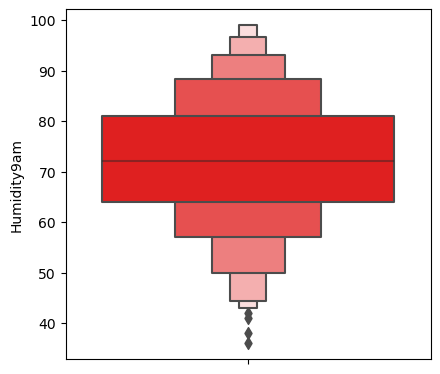

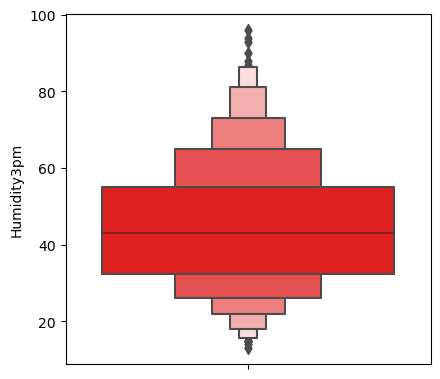

In [24]:
# Using box plot to check for any outliers in the data.
plt.figure(figsize=(16,10))
plt.subplot(231)
sns.boxenplot(data = datac, y = 'Humidity9am', color = 'r')

plt.figure(figsize=(16,10))
plt.subplot(232)
sns.boxenplot(data = datac, y = 'Humidity3pm', color = 'r')
plt.show()

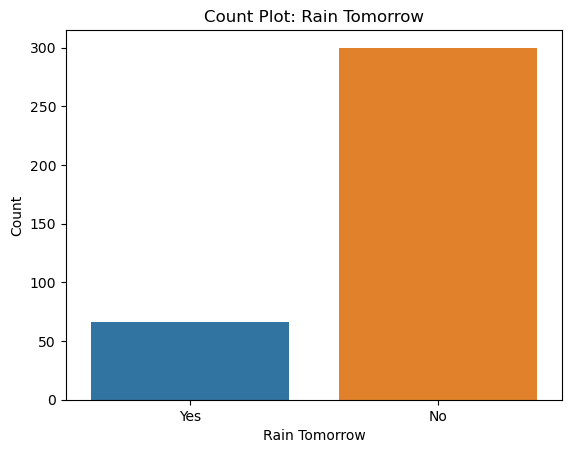

In [19]:
sns.countplot(x='RainTomorrow', data=datac)
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.title('Count Plot: Rain Tomorrow')
plt.show()

## 5 . Correlation and Weather Analysis
- Performing correlation analysis to identify relationships between different
weather parameters.
- Implementing regression analysis to predict one weather parameter based on
others.

In [20]:
datac.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.658470,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.467180,13.023978,7.875453,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,6.000000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


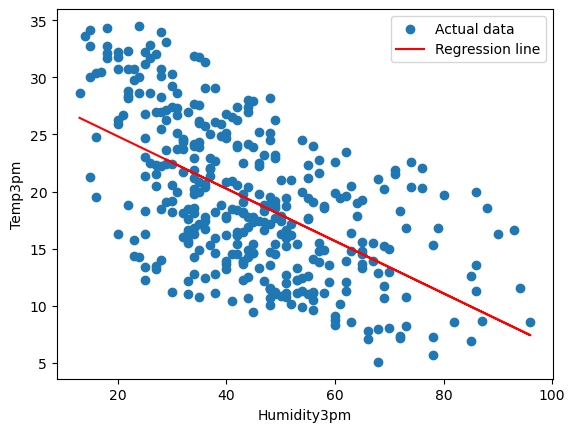

In [21]:
# Sample data
X = datac[['Humidity3pm']]
Y = datac['Temp3pm']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

# Make predictions
predictions = model.predict(X)

# Plot the data and the regression line
plt.scatter(X, Y, label='Actual data')
plt.plot(X, predictions, label='Regression line', color='red')
plt.xlabel('Humidity3pm')
plt.ylabel('Temp3pm')
plt.legend()
plt.show()

In [22]:
datac.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.752471,0.201939,0.649930,0.035531,0.217224,0.125954,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.218551
MaxTemp,0.752471,1.000000,-0.073560,0.690026,0.451395,0.109415,-0.214610,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,0.027557
Rainfall,0.201939,-0.073560,1.000000,-0.007293,-0.149326,0.096160,0.218877,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.089860
Evaporation,0.649930,0.690026,-0.007293,1.000000,0.316942,0.287709,0.067955,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,0.076762
Sunshine,0.035531,0.451395,-0.149326,0.316942,1.000000,0.095676,-0.064446,0.072494,-0.497692,-0.755186,0.006238,-0.035964,-0.678125,-0.658699,0.219276,0.469774,-0.378081
WindGustSpeed,0.217224,0.109415,0.096160,0.287709,0.095676,1.000000,0.518109,0.693641,-0.349433,-0.069432,-0.537126,-0.524435,-0.012648,0.050051,0.255331,0.072348,0.251912
WindSpeed9am,0.125954,-0.214610,0.218877,0.067955,-0.064446,0.518109,1.000000,0.466904,-0.267181,0.145873,-0.350081,-0.242905,0.100540,-0.021910,0.063018,-0.232851,0.038853
WindSpeed3pm,-0.065922,-0.167873,0.056008,0.048601,0.072494,0.693641,0.466904,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,-0.009447
Humidity9am,-0.207897,-0.359602,0.150109,-0.519587,-0.497692,-0.349433,-0.267181,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.165931
Humidity3pm,-0.040709,-0.533327,0.289013,-0.391780,-0.755186,-0.069432,0.145873,-0.026368,0.546718,1.000000,-0.087946,-0.010052,0.551633,0.510108,-0.255681,-0.581676,0.358752


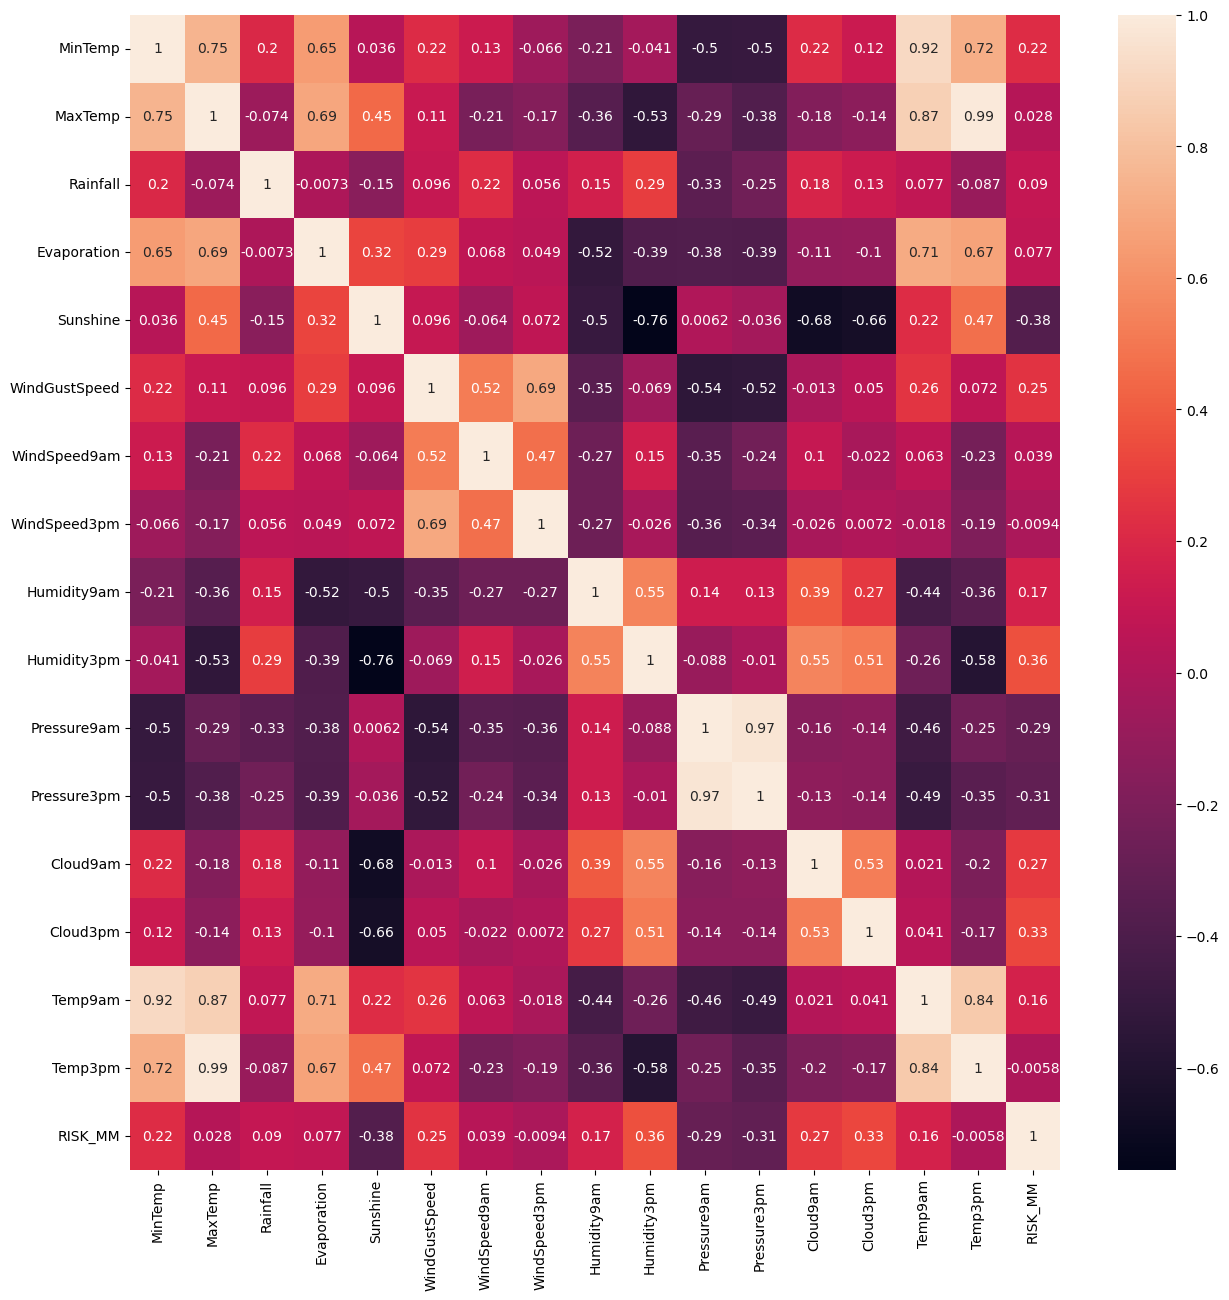

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(datac.corr(),annot=True)
plt.show()